# Financial Inclusion in Africa:


## 1. Objective:
The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account.

## 2.  Evaluation metric:
The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

## 3. Submission:
Your submission file should look like:
```
unique_id                   bank_account
<string>                    <number>
uniqueid_1 x Kenya              1
uniqueid_2 x Kenya              0
uniqueid_3 x Kenya              1 
```

## 4. Data:

* Numerical:
    * household_size: Number of people living in one house
    * age_of_respondent: The age of the interviewee

* Categorical/string:
    * country: Country interviewee is in.
    * year*: Year survey was done in.
    * uniqueid: Unique identifier for each interviewee
    * location_type: "Type of location: Rural, Urban"
    * cellphone_access: "If interviewee has access to a cellphone: Yes, No"
    * gender_of_respondent: "Gender of interviewee: Male, Female"
    * relationship_with_head: "The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
    * marital_status: "The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know"
    * education_level: "Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA"
    * job_type: "Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer"


## 5. Loading the data:

### 5.1. Setup:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path as path
%matplotlib inline

WORKING_DIR = "."
DATA_PATH = path.join(WORKING_DIR, "Data")

### 5.2. Loading data:

In [2]:
def load_data(data_path=DATA_PATH, file_name="Train_v2.csv"):
    csv_path = path.join(data_path, file_name)
    return pd.read_csv(csv_path)

In [3]:
fin_data = load_data()

## 6.1. Data exploration:

In [4]:
fin_data.head(15)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [5]:
fin_data.tail(15)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23509,Uganda,2018,uniqueid_2099,No,Rural,No,4,20,Female,Spouse,Married/Living together,Primary education,Other Income
23510,Uganda,2018,uniqueid_2100,No,Rural,Yes,4,30,Female,Spouse,Married/Living together,No formal education,Other Income
23511,Uganda,2018,uniqueid_2101,No,Rural,No,6,19,Female,Parent,Single/Never Married,Secondary education,No Income
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2,57,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23513,Uganda,2018,uniqueid_2103,No,Urban,Yes,7,26,Female,Head of Household,Married/Living together,Secondary education,No Income
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,6,24,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,6,16,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,3,35,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,9,16,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,9,20,Female,Child,Single/Never Married,Primary education,No Income


In [6]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
fin_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
cat_features = fin_data.select_dtypes(exclude=["int64"]).columns
cat_features = list(cat_features)
cat_features.extend(["year"]) # check the last section in the notebook for the explanation why "year" is categorical and not numerical

In [9]:
cat_features

['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'year']

In [10]:
for cat in cat_features:
    print(fin_data[cat].value_counts(), "\n ******")
    

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64 
 ******
uniqueid_1773    4
uniqueid_254     4
uniqueid_619     4
uniqueid_2078    4
uniqueid_588     4
                ..
uniqueid_8326    1
uniqueid_8141    1
uniqueid_7605    1
uniqueid_8160    1
uniqueid_6793    1
Name: uniqueid, Length: 8735, dtype: int64 
 ******
No     20212
Yes     3312
Name: bank_account, dtype: int64 
 ******
Rural    14343
Urban     9181
Name: location_type, dtype: int64 
 ******
Yes    17454
No      6070
Name: cellphone_access, dtype: int64 
 ******
Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64 
 ******
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64 
 ******
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seper

#### Observations:
* the data was correctly loaded (comparing the number of rows in the dataframe and the Train_v2.csv file, it's the same 23524).
* there's no missing data in this set.

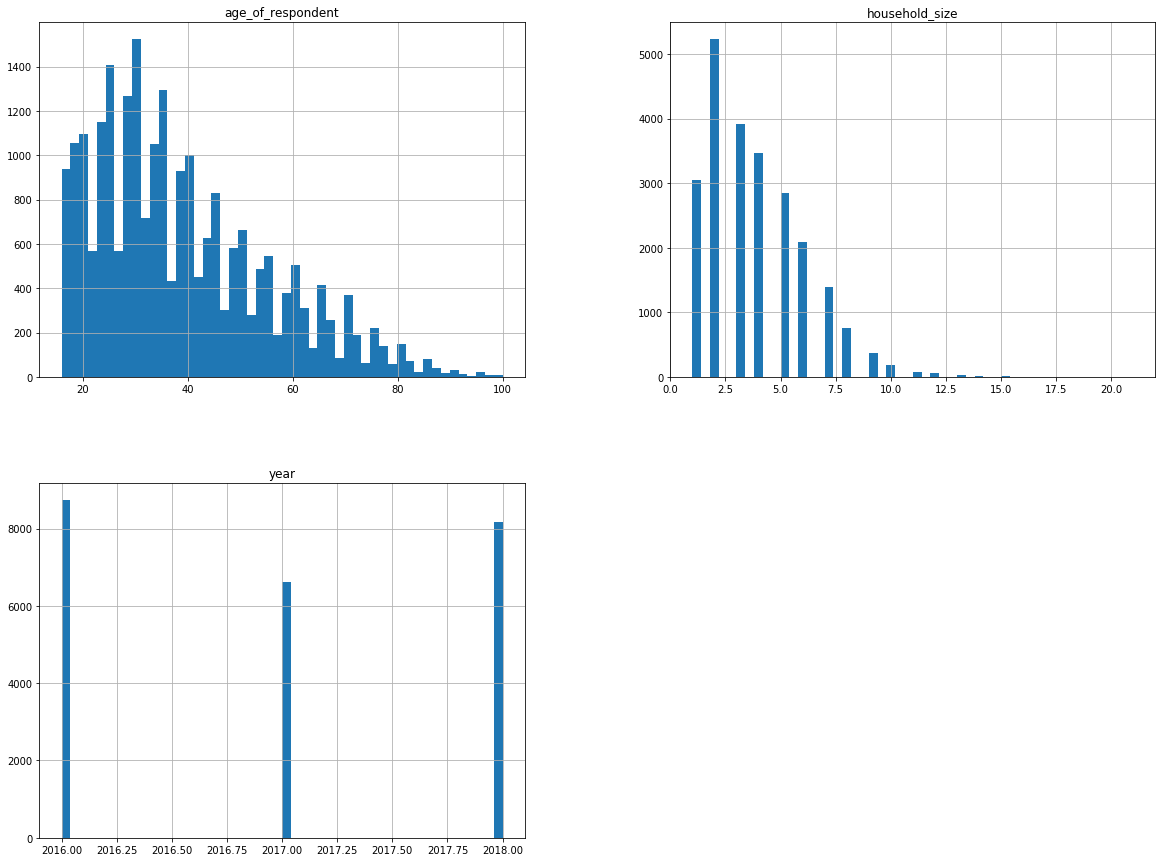

In [11]:
fin_data.hist(bins=50, figsize=(20,15))
plt.show()

## 7. Data Processing:

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [13]:
target = 'bank_account'
features = fin_data.drop(columns=[target, 'uniqueid'], inplace=False).columns
X = fin_data[features].copy()
y = fin_data[target].copy()
cat_features.remove('bank_account')
cat_features.remove('uniqueid')

In [14]:
X.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: bank_account, dtype: object

In [16]:
cat_features

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'year']

In [18]:
num_features = list(set(features) - set(cat_features))

In [19]:
num_features

['household_size', 'age_of_respondent']

In [37]:
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(sparse=False), cat_features),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [39]:
X_prepared.shape

(23524, 42)

## 8. Selecting and training a model:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
sgdclf = SGDClassifier(random_state=42)
accuracy = cross_val_score(sgdclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

Scores: [0.14485981 0.13593883 0.11819728 0.12244898 0.11394558 0.1335034
 0.13477891 0.12202381 0.10501701 0.11011905]
Mean: 0.1240832654217167
Standard deviation: 0.012158151492884994


In [45]:
LogisticRegression?

In [46]:
logistic_reg = LogisticRegression(random_state=42)
accuracy = cross_val_score(logistic_reg, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Scores: [0.16185217 0.15165675 0.11267007 0.10416667 0.10416667 0.12797619
 0.14030612 0.12287415 0.12287415 0.12967687]
Mean: 0.12782198053392982
Standard deviation: 0.018119488033980818


In [47]:
DecisionTreeClassifier?

In [48]:
dsntrclf = DecisionTreeClassifier(random_state=42)
accuracy = cross_val_score(dsntrclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

Scores: [0.25870858 0.24468989 0.17559524 0.15561224 0.16284014 0.15858844
 0.14668367 0.13265306 0.11862245 0.21896259]
Mean: 0.1772956293817442
Standard deviation: 0.0450674649096131


In [49]:
SVC?

In [50]:
svmclf = SVC(random_state=42)
accuracy = cross_val_score(svmclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

Scores: [0.14061172 0.13041631 0.11607143 0.11564626 0.1122449  0.13222789
 0.13010204 0.11479592 0.11267007 0.10756803]
Mean: 0.12123545679954226
Standard deviation: 0.010485926011608204


In [51]:
KNeighborsClassifier?

In [53]:
knnclf = KNeighborsClassifier()
accuracy = cross_val_score(knnclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

Scores: [0.19116398 0.19286321 0.13137755 0.12712585 0.12457483 0.13095238
 0.13605442 0.11394558 0.09778912 0.16539116]
Mean: 0.1411238072119247
Standard deviation: 0.03013369853622925


In [54]:
GaussianNB?

In [56]:
nbclf = GaussianNB()
accuracy = cross_val_score(nbclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

Scores: [0.33899745 0.35514019 0.13647959 0.15008503 0.10416667 0.14158163
 0.19982993 0.15221088 0.09991497 0.34311224]
Mean: 0.20215185904438243
Standard deviation: 0.09759482605277785


In [57]:
rfclf = RandomForestClassifier(random_state=42)
accuracy = cross_val_score(rfclf, X_prepared, y, scoring='accuracy', cv = 10)
for i in range(len(accuracy)):
    accuracy[i] = 1 - accuracy[i]
display_scores(accuracy)

C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

Scores: [0.20943076 0.21580289 0.15093537 0.14285714 0.13477891 0.14328231
 0.14498299 0.13052721 0.10459184 0.15816327]
Mean: 0.15353526924788607
Standard deviation: 0.032555580017849646


### Observations:
* Most promising models:
    * SVC
    * SGDClasssifier
    * LogisticRegression

## Ressources:

* *It would make no sense if year were quantitative. What does it mean to average two years? For example, is there any meaning to (2015+2016)/2? What about multiplying two years? (1995×2016) Based on these examples, it would be more reasonable to classify year as a categorical variable. ([an answer on Quora](https://www.quora.com/Is-year-a-quantitative-or-categorical-variable))
* [feature-engineering](https://elitedatascience.com/feature-engineering)
* [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)